In [11]:
names = ['preg','plasmaglu', 'bloodpressure','sknthckness', 'insulin', 'bmi', 'diabetes', 'age', 'class']

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data', names=names)

In [16]:
df.head(1000)

,preg,plasmaglu,bloodpressure,sknthckness,insulin,bmi,diabetes,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [18]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
%matplotlib inline

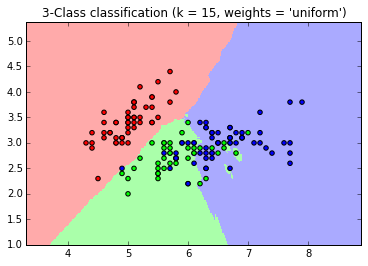

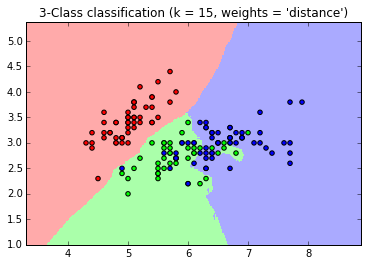

In [20]:
n_neighbors = 15

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

In [37]:
df_labels = df['diabetes']
df_X = df.drop('diabetes', axis=1)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [45]:
from sklearn.cross_validation import ShuffleSplit

In [46]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

In [47]:
from sklearn.grid_search import GridSearchCV

In [48]:
parameters = {'n_neighbors': range(1,30), 'weights': ['uniform', 'distance'],
             'p': range(1,4)}
clf = GridSearchCV(knn, parameters)

In [50]:
from sklearn.learning_curve import learning_curve
title = 'title'

In [53]:
from sklearn.linear_model import LinearRegression

In [56]:
df.head()

,preg,plasmaglu,bloodpressure,sknthckness,insulin,bmi,diabetes,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [58]:
y, X = df['class'], df.drop('class', axis=1)

In [59]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
feature_cols = ['preg', 'insulin']
X = df[feature_cols]
y = df['insulin']

In [67]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [68]:
from sklearn.cross_validation import ShuffleSplit
cv = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.2, random_state=0)

In [70]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [71]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l2', C=10)

In [72]:
logreg.fit(X_train_std, y_train)
zip(feature_cols, logreg.coef_[0])

[('preg', 0.34963169797740656), ('insulin', -15.015951089197689)]

In [73]:
y_pred_class = logreg.predict(X_test_std)

In [74]:
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.442708333333


In [76]:
import pandas as pd
%matplotlib inline

In [77]:
df.sample(10)


,preg,plasmaglu,bloodpressure,sknthckness,insulin,bmi,diabetes,age,class
502,6,0,68,41,0,39.0,0.727,41,1
374,2,122,52,43,158,36.2,0.816,28,0
606,1,181,78,42,293,40.0,1.258,22,1
134,2,96,68,13,49,21.1,0.647,26,0
296,2,146,70,38,360,28.0,0.337,29,1
551,3,84,68,30,106,31.9,0.591,25,0
127,1,118,58,36,94,33.3,0.261,23,0
448,0,104,64,37,64,33.6,0.510,22,1
175,8,179,72,42,130,32.7,0.719,36,1
760,2,88,58,26,16,28.4,0.766,22,0


In [79]:
df.describe()

,preg,plasmaglu,bloodpressure,sknthckness,insulin,bmi,diabetes,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [82]:
pd.factorize(df['preg'])

(array([ 0,  1,  2,  1,  3,  4,  5,  6,  7,  2,  8,  6,  6,  1,  4,  9,  3,
         9,  1,  1,  5,  2,  9, 10, 11,  6,  9,  1, 12,  4,  4,  5,  5,  0,
         6,  8, 11, 10,  7,  8,  5,  9,  9, 10,  9,  3,  1,  7,  9,  9,  1,
         1,  4,  2,  9,  1,  9,  3,  3,  3,  7,  2,  4,  7,  9,  4,  3,  7,
         1,  8,  7,  4, 12,  8,  1,  1,  9,  4,  3,  7,  5,  7,  9,  3,  4,
         7, 12,  7, 13,  1,  1,  8,  9,  8,  7,  0,  7,  1,  0,  1,  1,  1,
         3,  1,  7,  1,  1,  8,  5,  3,  5,  2,  1,  8,  9,  8,  4,  4,  8,
         8,  3,  0,  7,  4,  3,  1,  5,  1,  1,  3,  8, 10,  5,  2,  7,  7,
         3,  3,  3,  4,  5,  4,  7,  6,  8,  3, 10,  7,  4,  7,  1,  8, 10,
         1,  2,  9,  7,  1,  7, 14,  8,  9,  3,  7,  3,  0,  5,  8,  8,  5,
         0,  0,  7,  1,  7,  2,  0,  3,  4,  4,  0,  3,  1,  4,  8,  9,  2,
         1,  2,  4,  5, 10,  9, 11,  2,  4,  1,  5,  8,  8,  3,  1,  3,  7,
         0,  4,  2,  4,  1,  9,  7,  3,  9,  3, 10, 15,  4,  0,  4,  4,  3,
         7, 

In [83]:
df['y'] = pd.factorize(df['preg'])[0]
preg_key = pd.factorize(df['preg'])[1]

In [84]:
df.sample(5)

,preg,plasmaglu,bloodpressure,sknthckness,insulin,bmi,diabetes,age,class,y
553,1,88,62,24,44,29.9,0.422,23,0,1
412,1,143,84,23,310,42.4,1.076,22,0,1
708,9,164,78,0,0,32.8,0.148,45,1,10
23,9,119,80,35,0,29.0,0.263,29,1,10
468,8,120,0,0,0,30.0,0.183,38,1,2


In [86]:
from sklearn.feature_extraction.text import CountVectorizer

In [87]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold, cross_val_score

In [88]:
y, X = df['preg'], df.drop(['preg'], axis=1)

In [89]:
y

0       6
1       1
2       8
3       1
4       0
5       5
6       3
7      10
8       2
9       8
10      4
11     10
12     10
13      1
14      5
15      7
16      0
17      7
18      1
19      1
20      3
21      8
22      7
23      9
24     11
25     10
26      7
27      1
28     13
29      5
       ..
738     2
739     1
740    11
741     3
742     1
743     9
744    13
745    12
746     1
747     1
748     3
749     6
750     4
751     1
752     3
753     0
754     8
755     1
756     7
757     0
758     1
759     6
760     2
761     9
762     9
763    10
764     2
765     5
766     1
767     1
Name: preg, dtype: int64

In [91]:
X

,plasmaglu,bloodpressure,sknthckness,insulin,bmi,diabetes,age,class,y
0,148,72,35,0,33.6,0.627,50,1,0
1,85,66,29,0,26.6,0.351,31,0,1
2,183,64,0,0,23.3,0.672,32,1,2
3,89,66,23,94,28.1,0.167,21,0,1
4,137,40,35,168,43.1,2.288,33,1,3
5,116,74,0,0,25.6,0.201,30,0,4
6,78,50,32,88,31.0,0.248,26,1,5
7,115,0,0,0,35.3,0.134,29,0,6
8,197,70,45,543,30.5,0.158,53,1,7
9,125,96,0,0,0.0,0.232,54,1,2


In [92]:
nb = MultinomialNB()
nb.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [93]:
import pandas as pd
import json

In [97]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [99]:
from sklearn.cross_validation import cross_val_score

In [104]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 20)
    
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [105]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=5)
print('CV accuracy {}, Average accuracy {}'.format(scores, scores.mean()))

CV accuracy [ 0.1875      0.12820513  0.12987013  0.16        0.12837838], Average accuracy 0.146790727291


In [106]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(model, X, y, scoring='accuracy')
print('CV accuracy {}, Average accuracy {}'.format(scores, scores.mean()))

for n_trees in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(model, X, y, scoring='accuracy')
    print('CV accuracy {}, Average accuracy {}'.format(scores, scores.mean()))

CV accuracy [ 0.12643678  0.13671875  0.1314741 ], Average accuracy 0.131543211732
CV accuracy [ 0.11877395  0.12109375  0.09163347], Average accuracy 0.110500387499
CV accuracy [ 0.16475096  0.13671875  0.14342629], Average accuracy 0.148298667558
CV accuracy [ 0.16091954  0.12890625  0.14342629], Average accuracy 0.144417361684
CV accuracy [ 0.13409962  0.16015625  0.15139442], Average accuracy 0.14855009639
CV accuracy [ 0.1302682   0.140625    0.14342629], Average accuracy 0.138106498018
CV accuracy [ 0.14176245  0.1640625   0.14342629], Average accuracy 0.149750415643
CV accuracy [ 0.16091954  0.1328125   0.15537849], Average accuracy 0.149703508762
CV accuracy [ 0.14559387  0.1640625   0.13545817], Average accuracy 0.148371512354
CV accuracy [ 0.14942529  0.1484375   0.12350598], Average accuracy 0.140456254484
CV accuracy [ 0.15708812  0.1484375   0.15936255], Average accuracy 0.154962724135


In [ ]:
#Describe the content of the dataset and its goals
#This dataset looks at the Pima Indian female population. They have a high incidence rate of diabetes. If the Indian Health Service Hospital found a glucose concentration of at least 200 mg/dl the patient would be diagnosed with diabetes. Eight variables were chosen for predicting the onset of diabets in Pima Indian women. These variables include # of times pregnent, plasma glucose concentration at 2 hours in a test, diastolic blood pressire, skin fold thickness, 2-hour serum insulin, BMI, diabets pedigree function and age.

#Describe the features and formulate a hypothesis on which might be relevant in predicting diabetes
#I predict woman with plasma glucose concentrations of at least 200 mg/dl have a higher chance of having diabetes. Pregnant woman also experience high blood glucose levels.

#Describe the missing/NULL values. Decide if you should impute or drop them and justify your choice.
#The dataset states that there are zeros in places where they are biologically impossible, which comes up in skin fold thickness and 2 hour serum insulin. However, I believe the 2 hour serum insulin is the most important variable and therefore will not be dropping it even though it includes missing data.

#Just using pregnancy and 2 hour serum insulin with Logistic regression, my model was only %44 accurate.

#I can't tell what my NB answer read -- line 92

#I can't tell what my Random Forest read 
